<a href="https://colab.research.google.com/github/evnrodr/probabilistic-algorithms/blob/main/Probability_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Probability Theories | Algorithms

## Initial Importations and Plot Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Global customizations for plotting

# Figure

plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 600

# Axes

plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.labelweight'] = 600
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.xmargin'] = 0.05
plt.rcParams['axes.titleweight'] = 600
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'

# Ticks

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Grid

plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.4

# Minor

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['lines.linewidth'] = 2

## Problems

### Coin Flip Probability

In this problem we're going to simulate the coin flip probability in which **_p_** is the chance of "heads" or "tails" output (represented as 1, otherwise 0).

In [100]:
def coin_flip(p=0.5, number_simulations=10):
    
    # Variables to store the number of heads and tails
    n_heads = 0
    n_tails = 0

    # Stores the number of simulations
    simulations = []

    # Stores the frequency of heads and tails
    heads_frequency = []

    # The simulation itself 
    for simulation in np.arange(1, number_simulations, 10):
        
        n_heads = 0
        n_tails = 0

        for i in range(1, simulation):
            if (np.random.uniform() < p):
                n_heads += 1 
            else:
                n_tails += 1
        
        heads_frequency.append(n_heads/simulation)
        simulations.append(simulation)

    # Adding data to the plot
    fig, ax = plt.subplots(1, 1, figsize=(14, 12))
    ax.plot(simulations, heads_frequency, aa=True, c='blue', ls='-', lw=2.5, label="Frequency of heads")
    ax.axhline(y=p, aa=True, c='green', ls='--', lw=3, label = 'Choosen P value')

    # Customizing the plot
    fig.suptitle("Coin Flip Problem")
    ax.set_title(f"Frequency of heads: {round(heads_frequency[-1], 2)}")
    ax.set_xlabel("Number of Simulations")
    ax.set_ylabel("Frequency")
    plt.legend(prop=dict(weight='bold'))
    ax.locator_params(integer=True)

    return plt.show()    

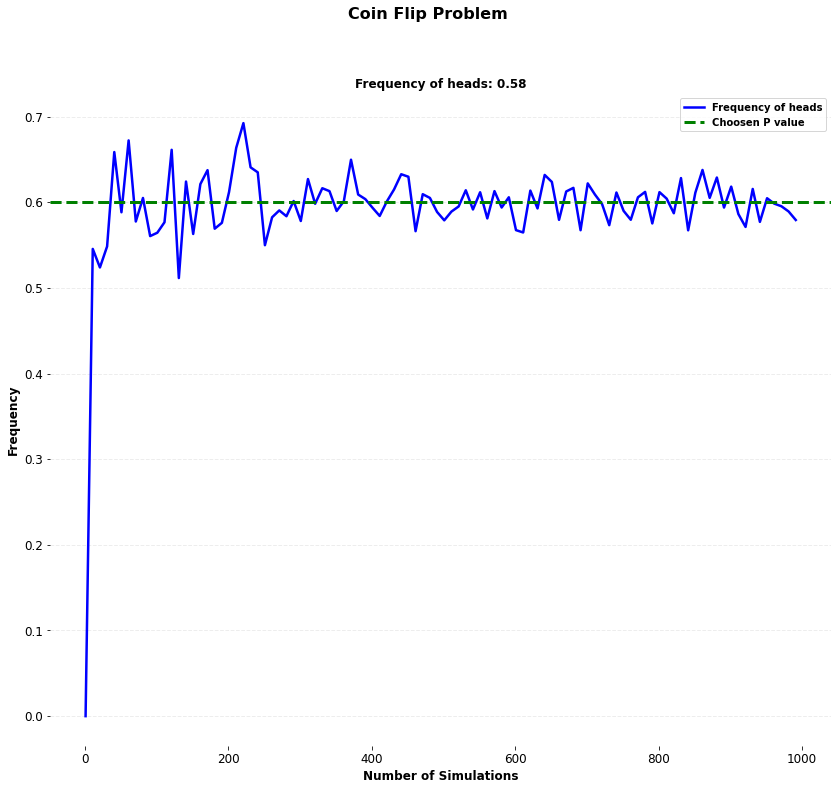

In [102]:
coin_flip(p=0.6, number_simulations=1000)